In [1]:
import os
import sys

# Import Code modules
module_path = os.path.abspath(os.path.join('../code'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Con'd import
from data_fetcher import DataFetcher
from endpoint_type import EndpointType
from db_connector import DBConnector
from flusurv_params import *
from fluview_params import *
from gft_params import *

db_connector = DBConnector()

In [3]:
fluview_param = FluViewParams(
    epiweeks = "201300-201547",
    regions = [FluViewRegion.NAT]
)

flueview_data = DataFetcher.fetch(
    endpoint = EndpointType.FLUVIEW, 
    param = fluview_param
)

In [4]:
gft_param = GTFParams(
    epiweeks = "201300-201547",
    regions = [GFTRegion.NAT]
)

gft_data = DataFetcher.fetch(
    endpoint = EndpointType.GFT, 
    param = gft_param
)

In [5]:
import pandas as pd

In [6]:
data_merge = flueview_data.merge(gft_data, how='inner', on='epiweek')

In [7]:
data_merge['epiweek'] = data_merge['epiweek'].astype(int)-1
data_merge['epiweek'] = data_merge['epiweek'].astype(str)

In [8]:
data_merge['epiweek'] = pd.to_datetime(data_merge['epiweek'] + "0", format="%Y%W%w")

<AxesSubplot:label='c3cf90bc-84e3-4264-a437-df655b19f655'>

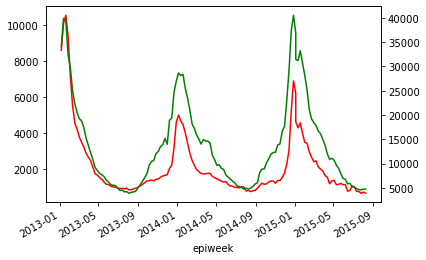

In [9]:
data_merge = data_merge.set_index('epiweek')
df = pd.Series(data = data_merge['num'], index = data_merge.index)
df2 = pd.Series(data = data_merge['num_ili'], index = data_merge.index)
df.plot(color='red')
df2.plot(color='green', secondary_y=True)

In the above sections, I want to solve the research question that how influenza illness case number impacts the flu-related website hit number of Google. Therefore, the API data endpoints I use in this section are 'FlueView' and 'Google Flu Trend'. It is obvious that the variable I want to analyze are the influenza illness case number, which is named 'num_ili' in the data, and the flu-related website hit number of Google , which is named 'num' in the data.

Before analyzing, I first request the API with the parameters I want. I request the data with epiweek from 2013 to 2015, which means that it will show weekly data from 2013 to 2015. The region I request for this data is 'national', which means that I will obtain the national data in the US. 

After requesting the data, I draw a time trend plot of the 'num_ili' and 'num' in one graph. From the plot above, we can see two lines. The red line is the time trend of 'num', and the green line is the trend of 'num_ili'. These two lines show exactly similar trend from 2013 to 2015. From the similar trend, we can make a conclusion that when the influenza illness case number is large, the flu-related website hit number of Google will also be large. We can say that people will search influenza related website in Google more frequently when flu is prevailing.

In [10]:
fluview_param2 = FluViewParams(
    epiweeks = "201300-201547",
    regions = [GFTRegion.HHS1,GFTRegion.HHS2,GFTRegion.HHS3,GFTRegion.HHS4,GFTRegion.HHS5,GFTRegion.HHS6,
              GFTRegion.HHS7,GFTRegion.HHS8,GFTRegion.HHS9,GFTRegion.HHS10]
)

flueview_data2 = DataFetcher.fetch(
    endpoint = EndpointType.FLUVIEW, 
    param = fluview_param2
)

In [11]:
flueview_data2 = flueview_data2.groupby('epiweek')['num_patients', 'num_ili'].sum()

<ipython-input-11-6bb6ccf8c427>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flueview_data2 = flueview_data2.groupby('epiweek')['num_patients', 'num_ili'].sum()


In [12]:
gft_param2 = GTFParams(
    epiweeks = "201300-201547",
    regions = [GFTRegion.HHS1,GFTRegion.HHS2,GFTRegion.HHS3,GFTRegion.HHS4,GFTRegion.HHS5,GFTRegion.HHS6,
              GFTRegion.HHS7,GFTRegion.HHS8,GFTRegion.HHS9,GFTRegion.HHS10]
)

gft_data2 = DataFetcher.fetch(
    endpoint = EndpointType.GFT, 
    param = gft_param2
)

In [13]:
gft_data2 = gft_data2.groupby('epiweek').sum()

In [14]:
data_merge2 = flueview_data2.merge(gft_data2, how='inner', on='epiweek')
data_merge2 = data_merge2.reset_index()
data_merge2['epiweek'] = data_merge2['epiweek'].astype(int)-1
data_merge2['epiweek'] = data_merge2['epiweek'].astype(str)
data_merge2['epiweek'] = pd.to_datetime(data_merge2['epiweek'] + "0", format="%Y%W%w")

<AxesSubplot:label='d28ca58c-ba96-455c-ae7d-0e6cb5d573a7'>

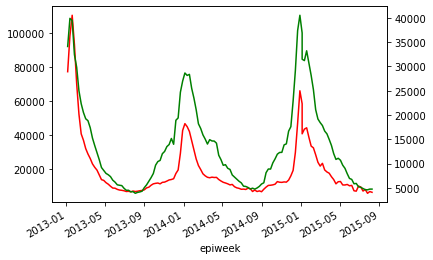

In [15]:
data_merge2 = data_merge2.set_index('epiweek')
data = pd.Series(data = data_merge2['num'], index = data_merge2.index)
data2 = pd.Series(data = data_merge2['num_ili'], index = data_merge2.index)
data.plot(color='red')
data2.plot(color='green', secondary_y=True)

To check the accuracy of the conclusion I made, I did a same analysis on data requested from region 'hhs1' to 'hhs10'. The plot above shows the same result with my previous analysis. 